# Data Understanding

In [59]:
# Task : import semua library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Exploratory Data Analysis

In [60]:
# Task : load dataset
df = pd.read_csv('football.csv')
df.head()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [61]:
# Task : bentuk dari dataset
df.shape

(1216, 7)

> Dataset memiliki 1,216 baris dan 7 kolom fitur.

In [62]:
# Task : memengetahui info dataset seperti null dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


> Tidak ada data yang bernilai `null`. Terdapat 3 fitur bertipe string (Teams, Seasons, Players) dan 4 fitur bertipe numerik (Mathes, Goals, Assists, Seasons Ratings).

In [63]:
# Task : Mengumpulkan fitur numerik
numerical_features = df.select_dtypes(include=['number']).columns.to_list()
numerical_features

['Matches', 'Goals', 'Assists', 'Seasons Ratings']

> Terdapat 4 fitur yang memiliki tipe numerik sesuai dengan `df.info()`.

In [64]:
# Task : memeriksa missing value atau bernilai 0
missing_values = (df[numerical_features] == 0).sum()
missing_values

Matches              0
Goals              152
Assists            174
Seasons Ratings      0
dtype: int64

> Tidak terdapat nilai `null`, tetapi ada value yang bernilai 0 sehingga perlu dilakukan operasi untuk menangani missing value.

In [65]:
# Task : mencatat semua index yang memiliki goals atau assist 0
miss_values_loc = df.loc[(df['Goals']==0) | (df['Assists']==0)]
miss_values_loc.shape

(257, 7)

> Terdapat total 257 baris yang perlu ditangani dalama proses Data Preparation.

In [66]:
# Task : Mengetahui ringkasan distribusi data
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,1216.000000,1216.000000,1216.000000,1216.000000
mean,37.024671,8.059211,4.797697,7.111595
std,11.762088,9.351558,4.496019,0.410907
min,1.000000,0.000000,0.000000,5.100000
25%,31.000000,2.000000,1.000000,6.900000
50%,39.000000,4.000000,4.000000,7.100000
75%,46.000000,12.000000,7.000000,7.300000
max,59.000000,55.000000,25.000000,8.900000


> Dapat dilihat dari mean dan standar deviasi bahwa perlu dilakukan penanganan.

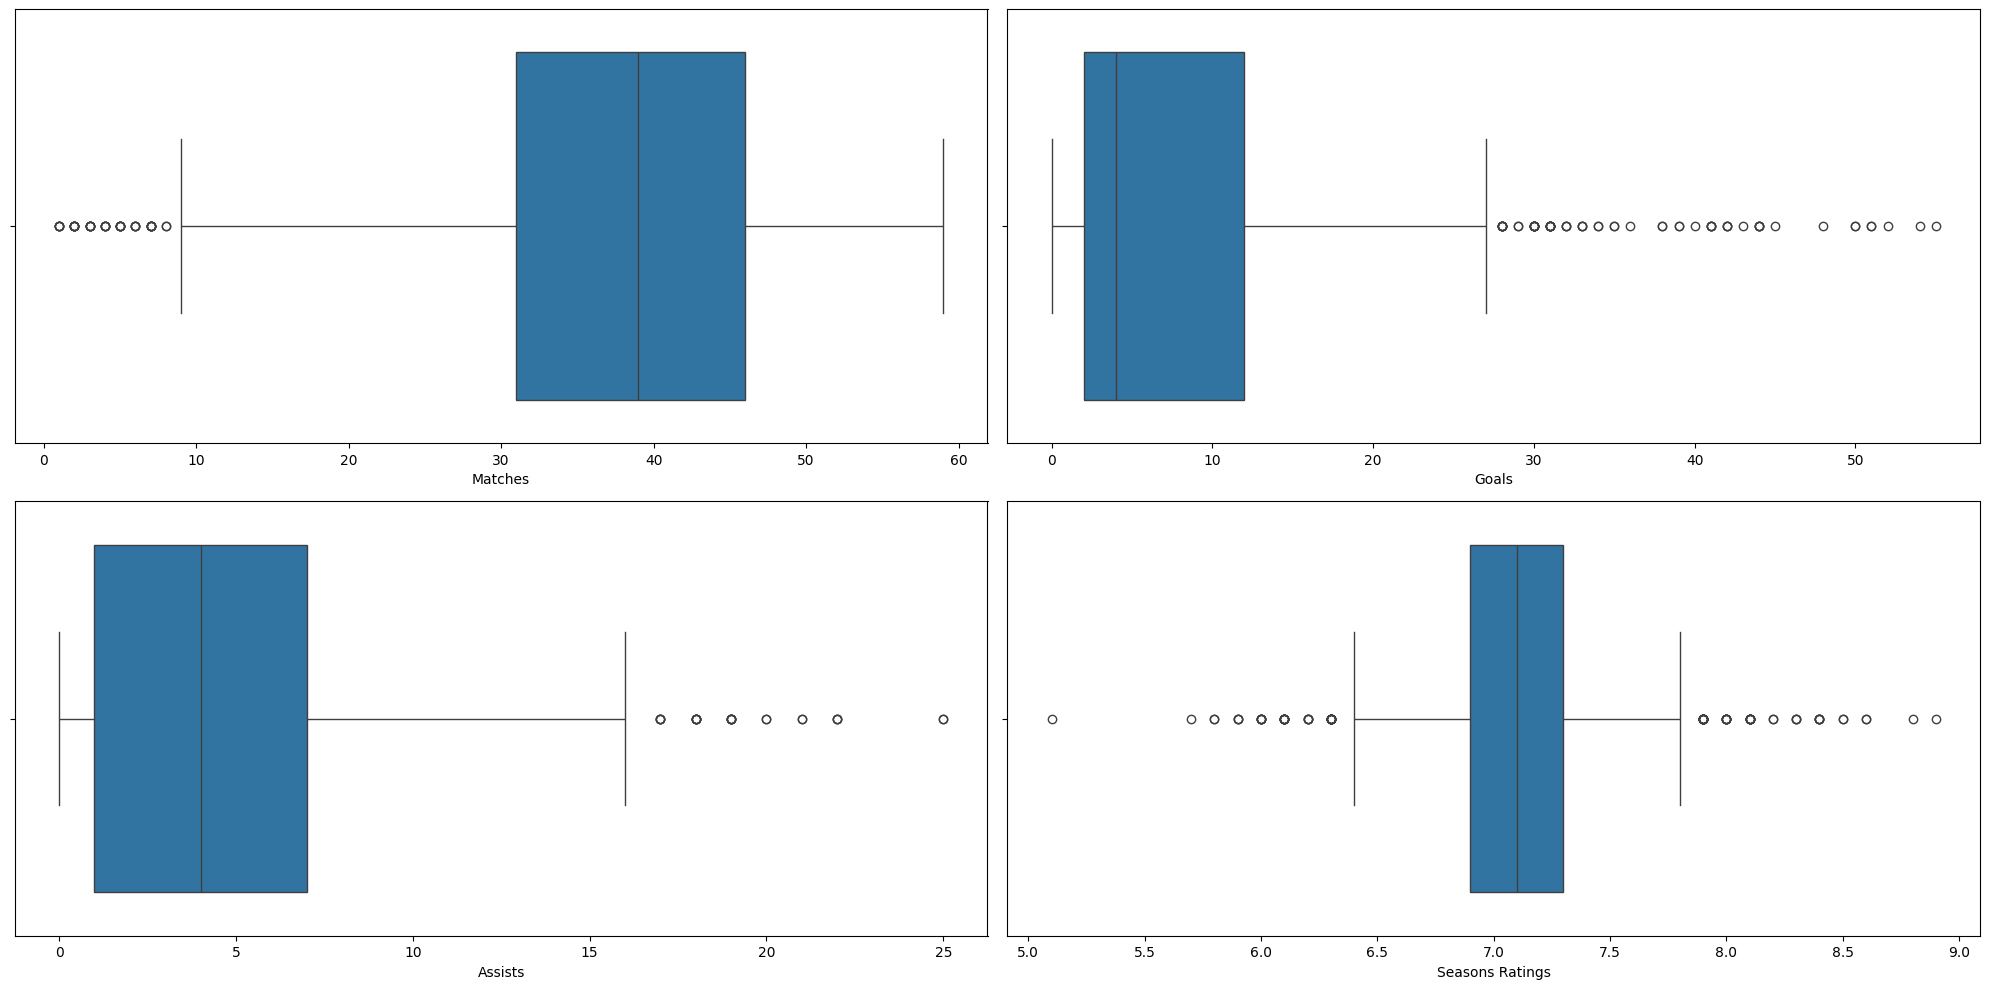

In [67]:
# Task : memeriksa sebaran data khususnya outlier
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

> Terlihat banyak outlier yang perlu dibersihkan

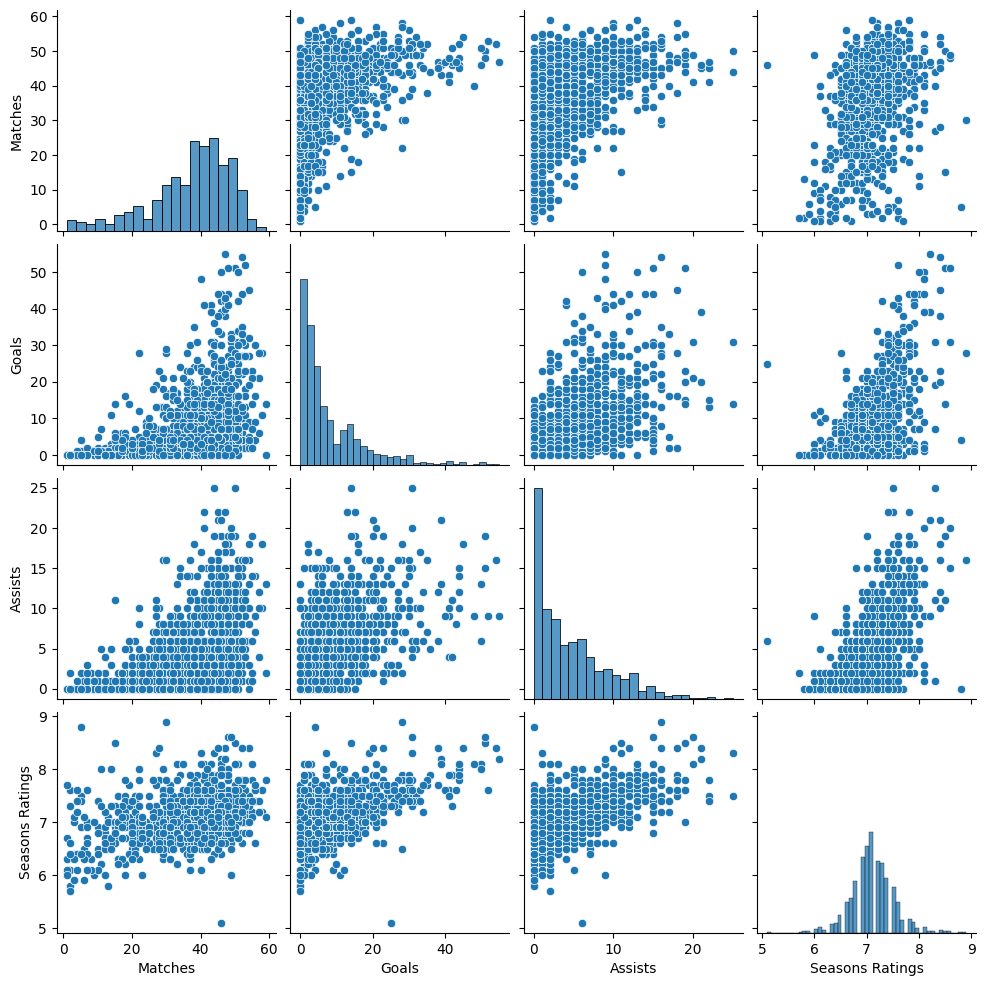

In [68]:
# Task : Mengetahui hubungan antar fitur
sns.pairplot(df)

> Secara sekilas terlihat bahwa hubungan antar fitur berkorelasi searah. Selain itu, sebaran data dapat terlihat beberapa yang skew sehingga perlu dilakukan operasi untuk menangani hal tersebut.

<Axes: >

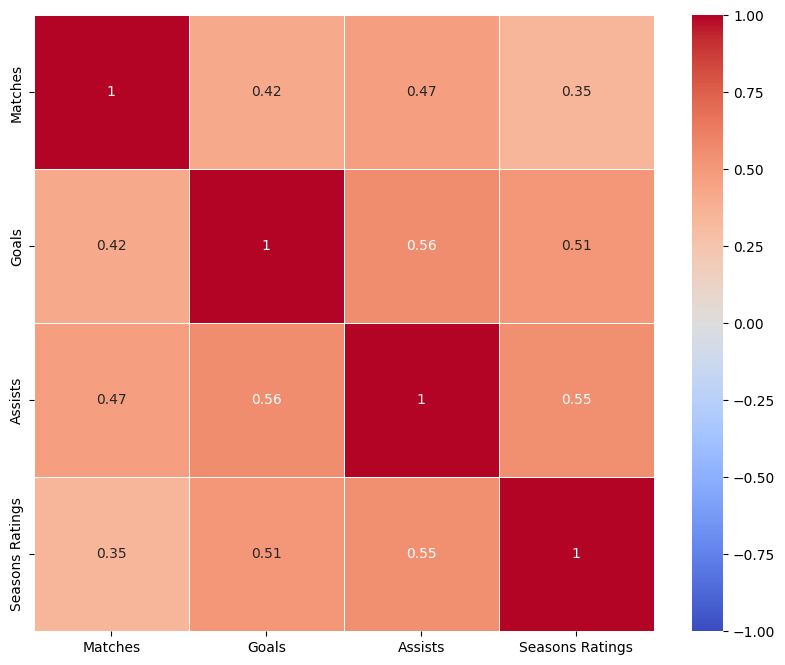

In [69]:
# Task : mengetahui korelasi antar fitur
plt.figure(figsize=(10, 8))

correlation_matrix = df[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

> Sesuai hasil dari pairplot, korelasi antar fitur bernilai positif semua.

# Data Preparation

In [70]:
# Task : Hapus fitur selain numerik karena tidak diperlukan dalam proyek kali ini
df = df[numerical_features]
df.head()

,Matches,Goals,Assists,Seasons Ratings
0,15,14,11,8.5
1,14,11,5,8.0
2,41,21,20,8.1
3,34,11,14,7.9
4,47,38,12,8.4


> Fitur selain numerik tidak diperlukan dalam proyek kali ini karena menghitung prediksi rating pamain sehingga fitur selain nnumerik dihapus.

In [71]:
# Task : Drop index yang memiliki goals atau assist 0
df = df.drop(miss_values_loc.index)
df.shape

(959, 4)

> Terdapat 959 baris setelah dilakukan drop. 

In [72]:
# Task : Mengurangi outlier dengan menggunakan IQR
q1 = df[numerical_features].quantile(0.25) 
q3 = df[numerical_features].quantile(0.75)
iqr = q3 - q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

df = df[~((df[numerical_features] < batas_bawah) | (df[numerical_features] > batas_atas)).any(axis=1)]
df.shape

(867, 4)

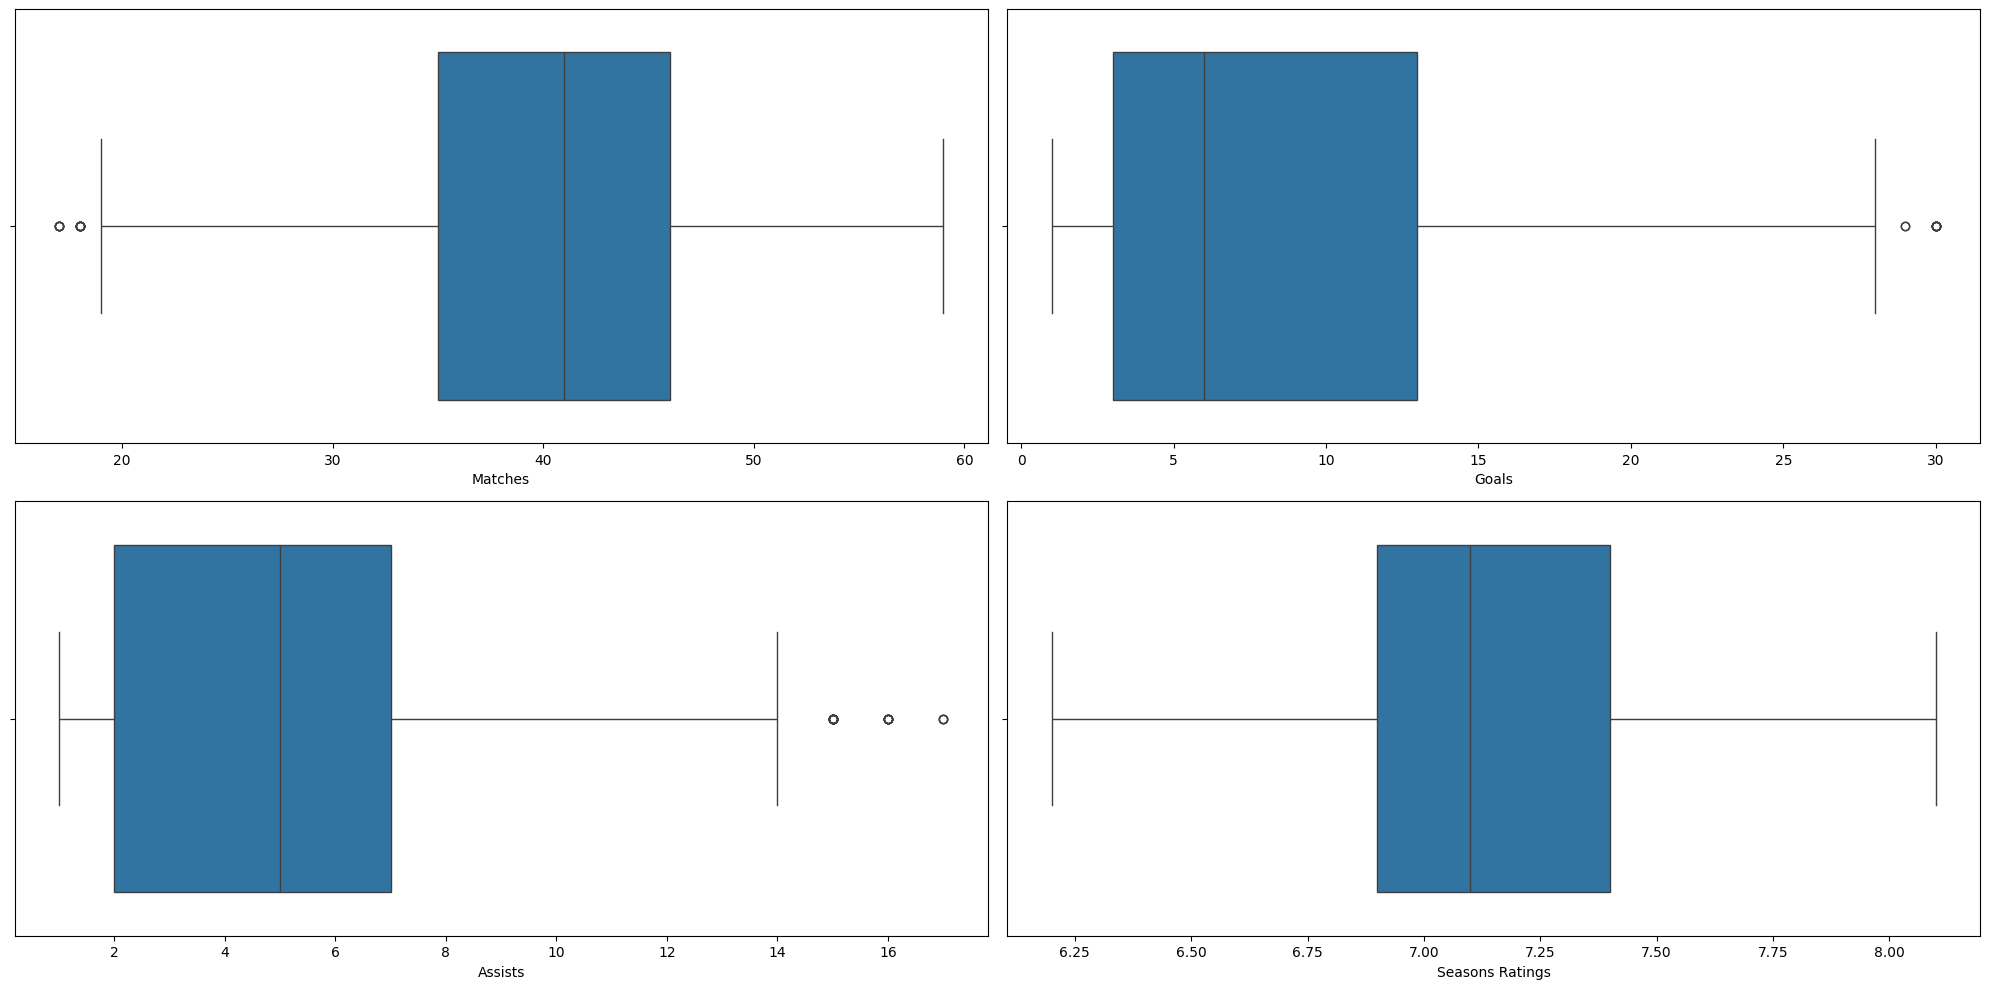

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x=numerical_features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

> Dapat dilihat sebaran data lebih terdistribusi merata

In [74]:
# # Standardisasi (mean=0, std=1)
# scaler = StandardScaler()
# df['scaled_goals'] = scaler.fit_transform(df[['Goals']])

# # Normalisasi (0-1 range)
# scaler = MinMaxScaler()
# df['normalized_goals'] = scaler.fit_transform(df[['Goals']])

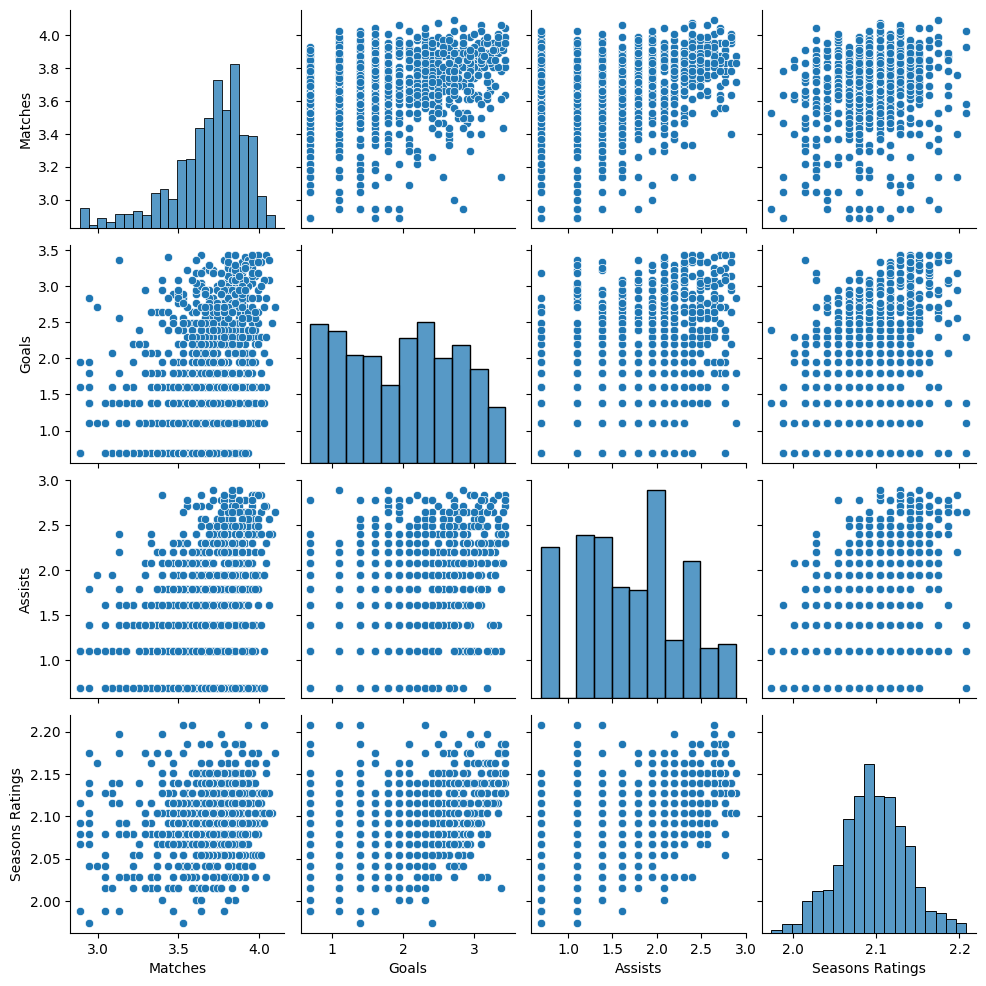

In [75]:
data1 = df.apply(lambda x : np.log1p(x))
sns.pairplot(data1)

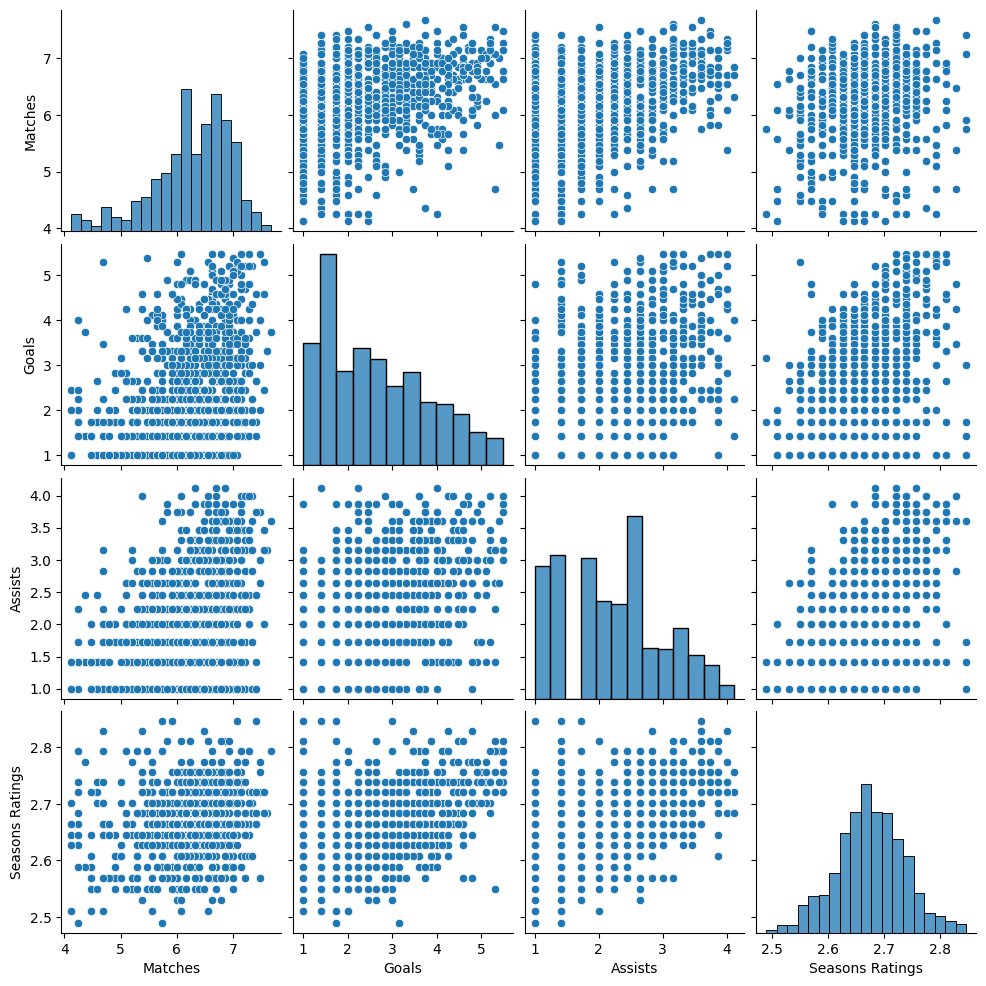

In [76]:
data2 = df.apply(lambda x : np.sqrt(x))
sns.pairplot(data2)

In [77]:
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,867.000000,867.000000,867.000000,867.000000
mean,39.813149,8.372549,5.442907,7.140830
std,8.458411,7.019493,3.776358,0.325928
min,17.000000,1.000000,1.000000,6.200000
25%,35.000000,3.000000,2.000000,6.900000
50%,41.000000,6.000000,5.000000,7.100000
75%,46.000000,13.000000,7.000000,7.400000
max,59.000000,30.000000,17.000000,8.100000
